# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [12]:
# import packages 

In [14]:
import pandas as pd #it is used data frames
import numpy as np #it is used matrics
import matplotlib.pyplot as plt #it is used visualization
import seaborn as sns #it is used graps,charts etc..

# Load the Dataset

In [26]:
# read the dataset
df= pd.read_csv('sales_data_with_discounts.csv')

In [28]:
# display the first 5 rows
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [32]:
# to display the datatypes in dataset total rows and columns and also full review of to taken dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


# Descriptive Analytics for Numerical Columns

#Objective: Compute mean, median, mode, and standard deviation.

In [102]:
#	Identify numerical columns and categorical columns in the dataset
# Identify categorical columns where dtype == 'O'
cat_cols = df.columns[df.dtypes == 'O']
print("Categorical Columns: ", cat_cols)

# Identify numerical columns where dtype != 'O'
num_cols = df.columns[df.dtypes != 'O']
print("\nNumerical Columns: ", num_cols)


Categorical Columns:  Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

Numerical Columns:  Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [106]:
#Calculate Descriptive Statistics for Numerical Columns: Mean, Median, Mode, and Standard Deviation for numerical columns
for col in num_cols:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")



Column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


# Data Visualization

# HISTOGRAMS

	Plot histograms for each numerical column.

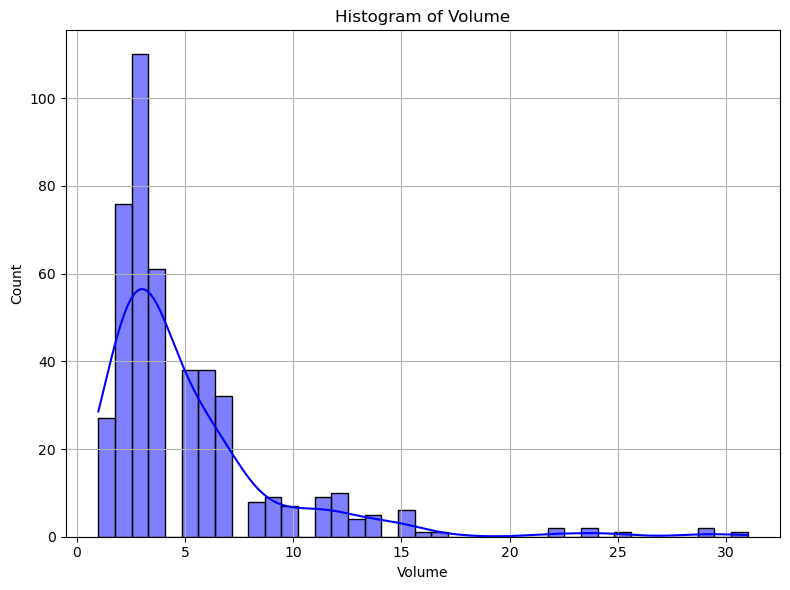

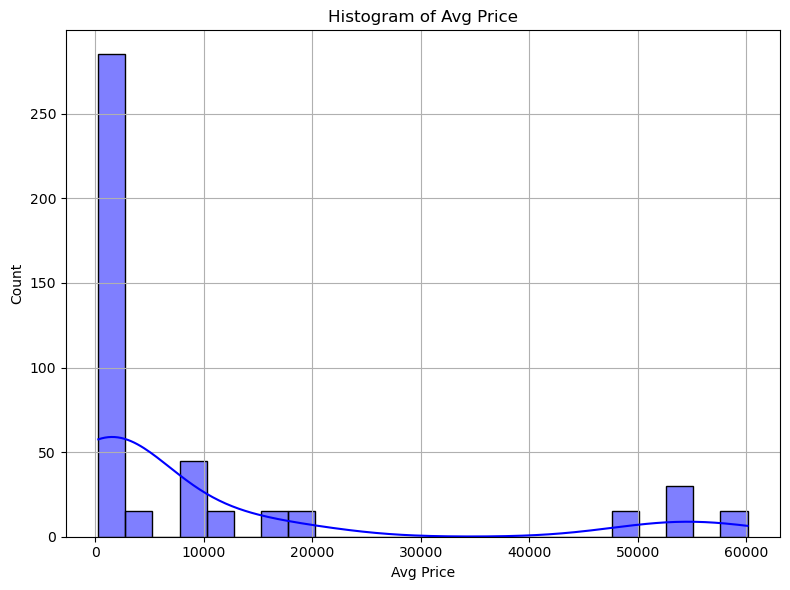

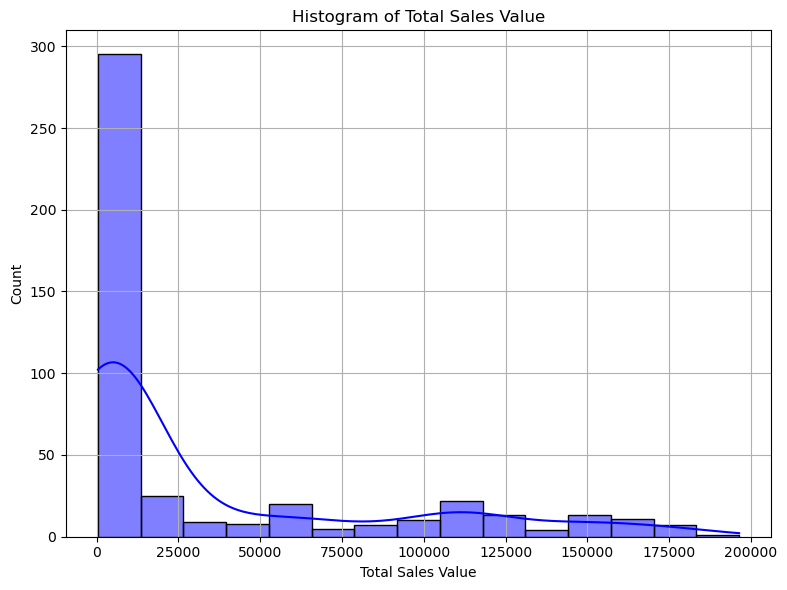

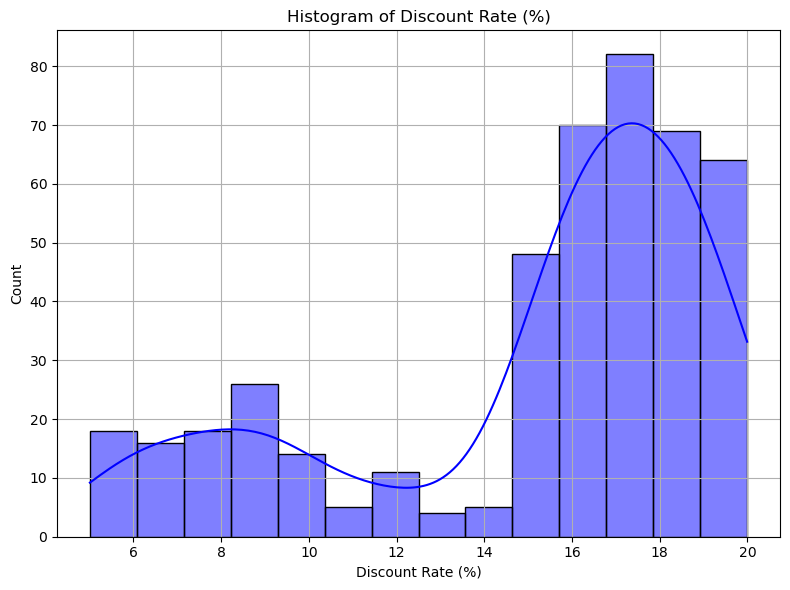

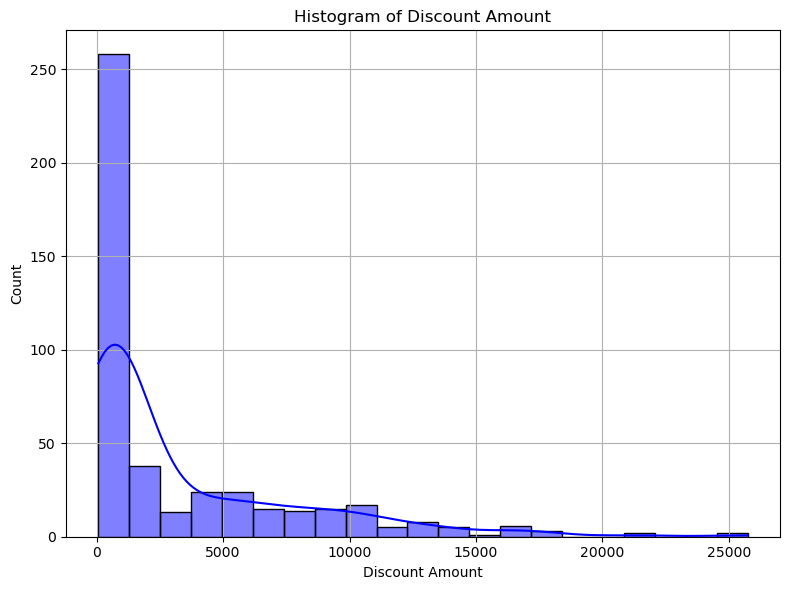

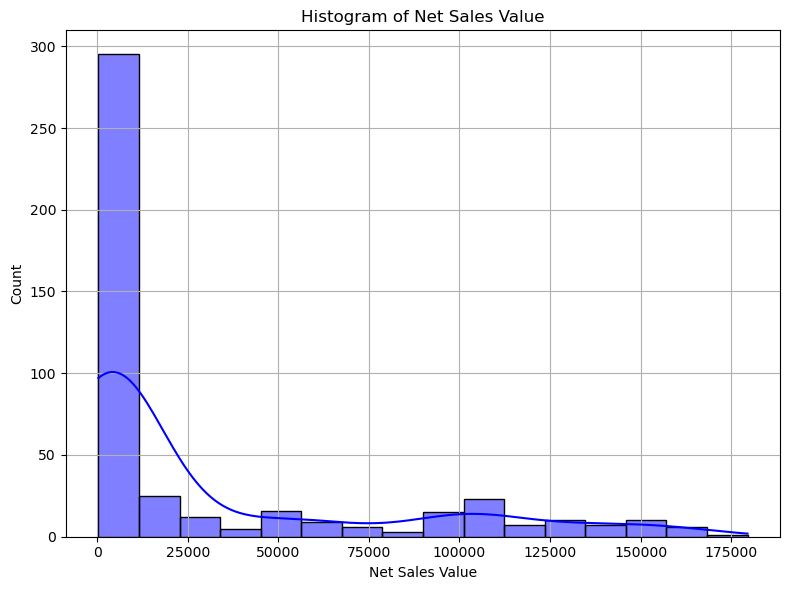

In [111]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], kde=True,color='blue')
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.grid()

# Boxplots:

Plot boxplots for num_cols to identify outliers

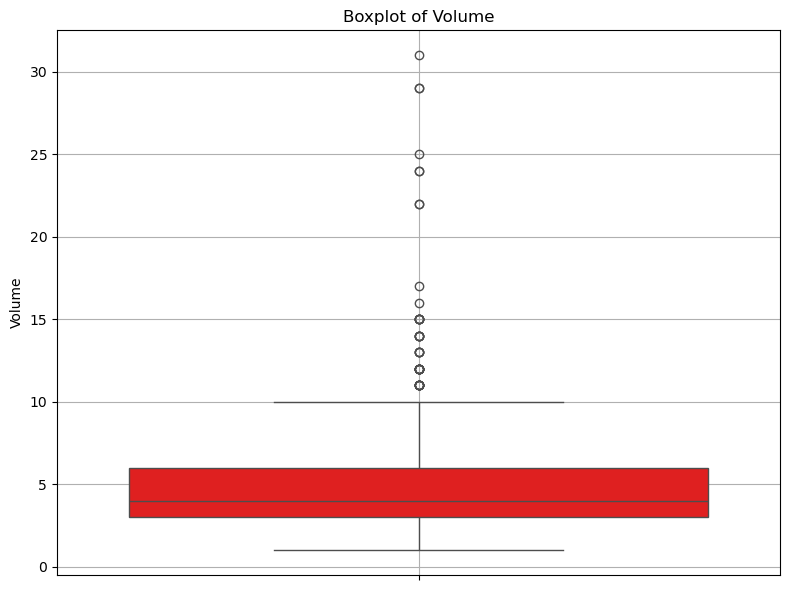

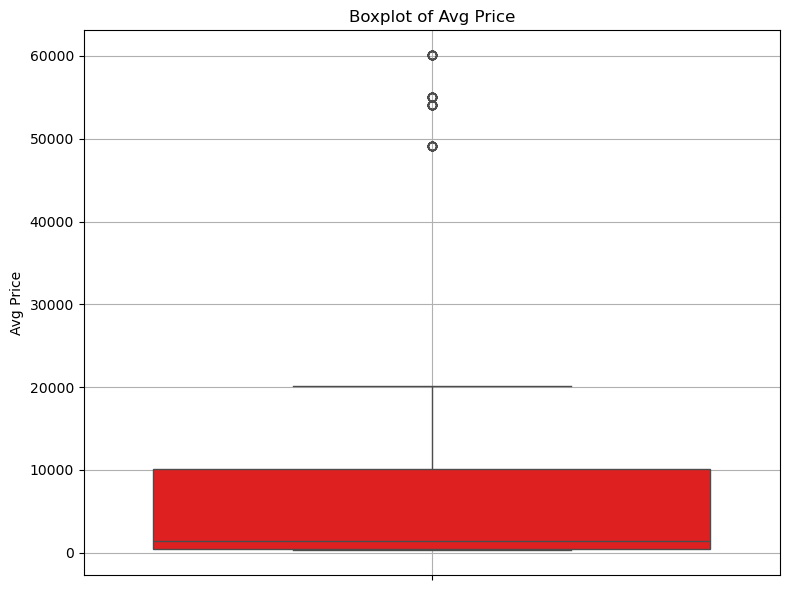

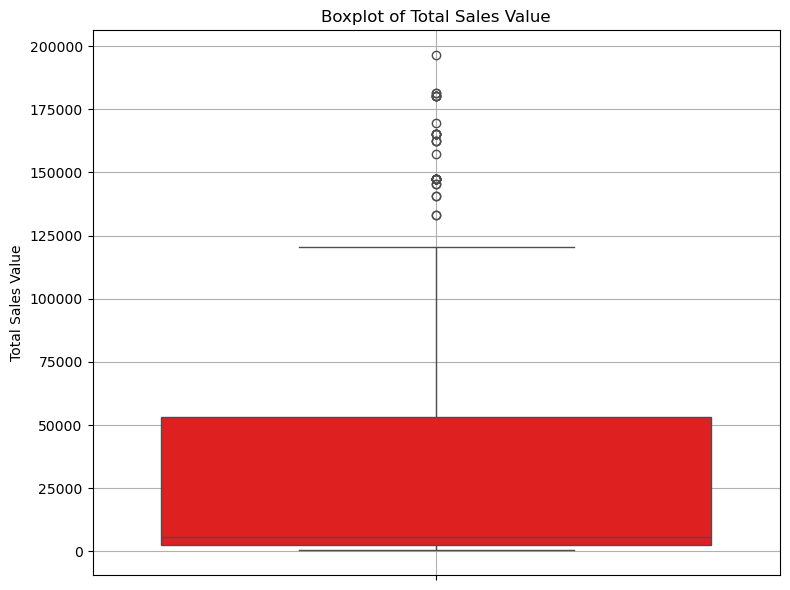

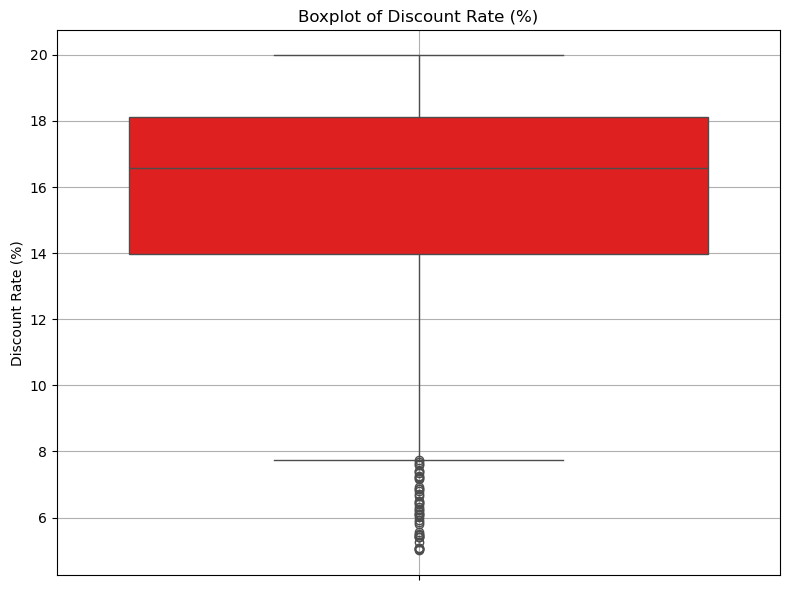

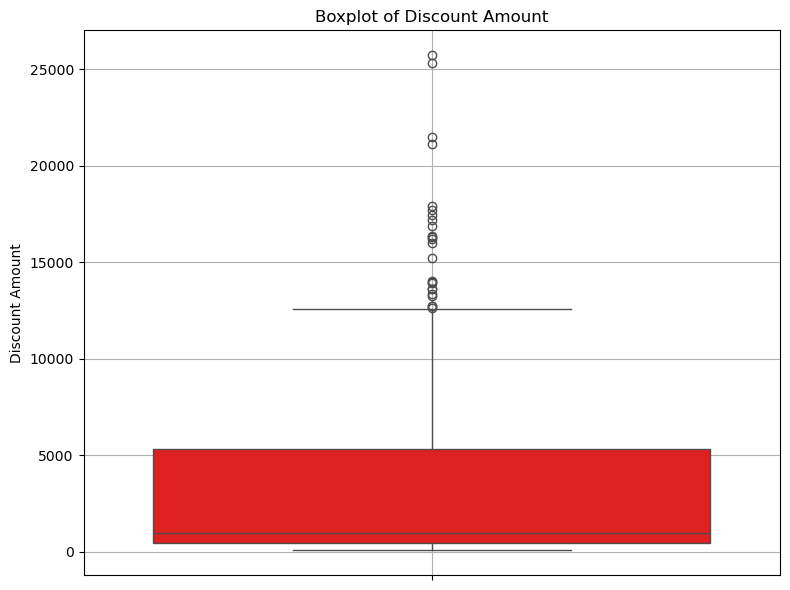

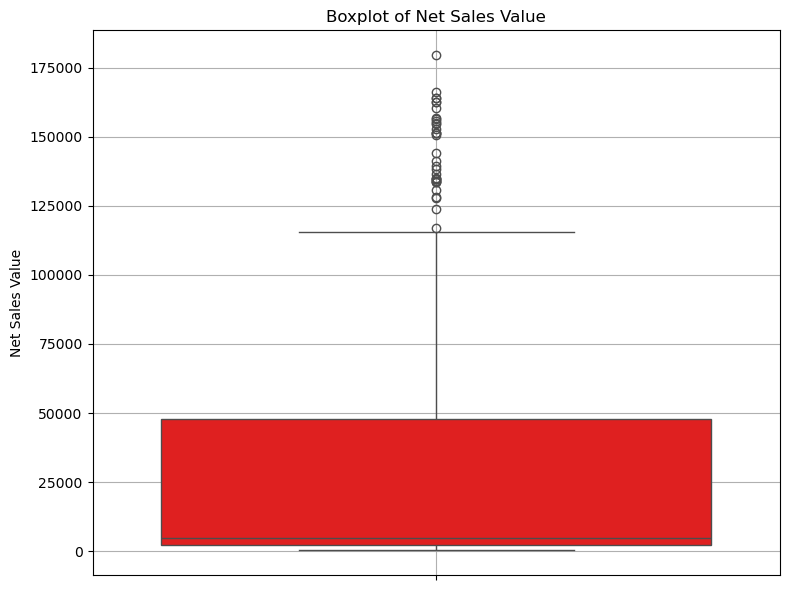

In [124]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col],color='red')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.grid()

# Bar Chart Analysis for Categorical Column:

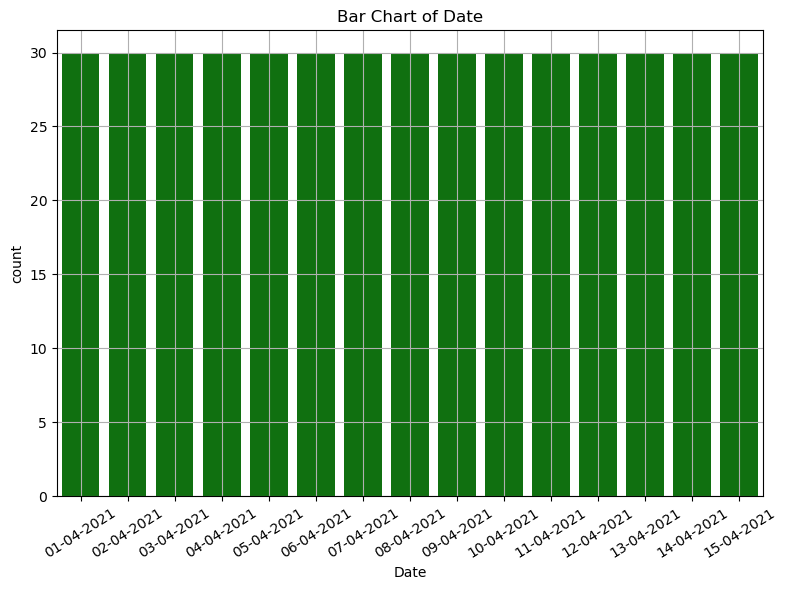

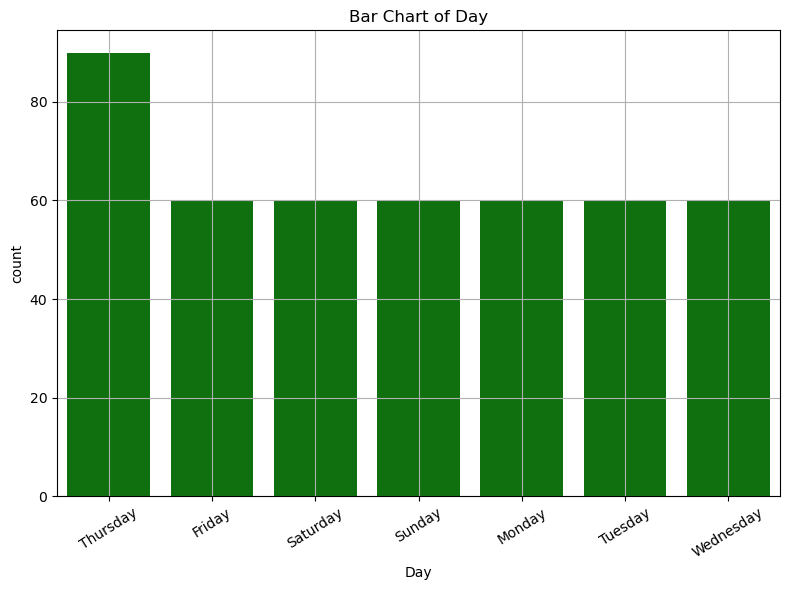

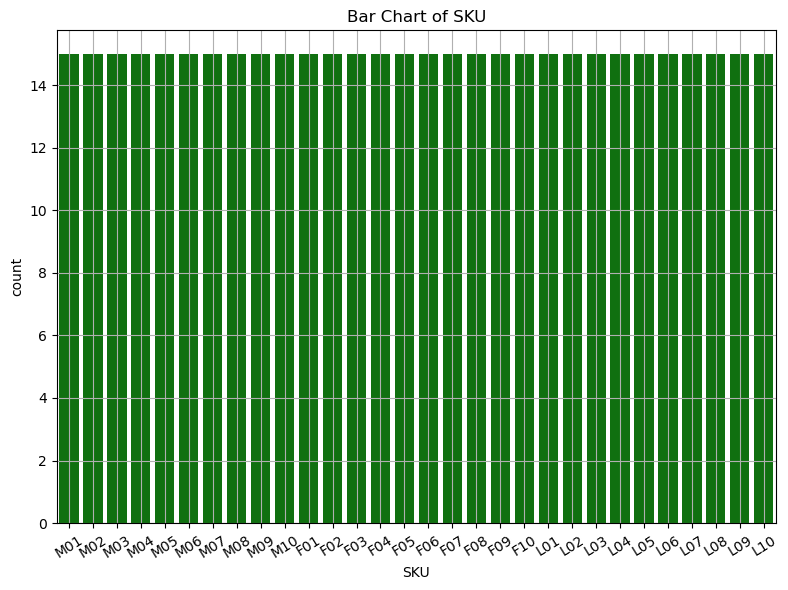

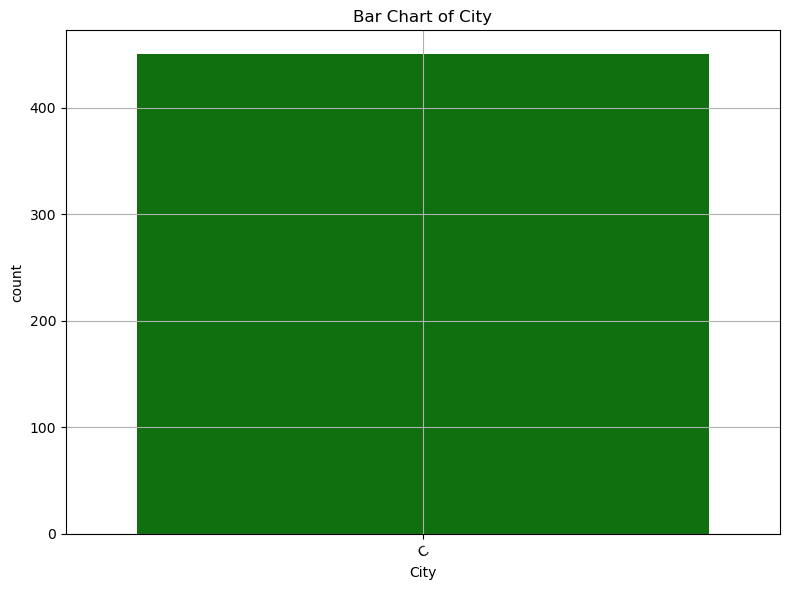

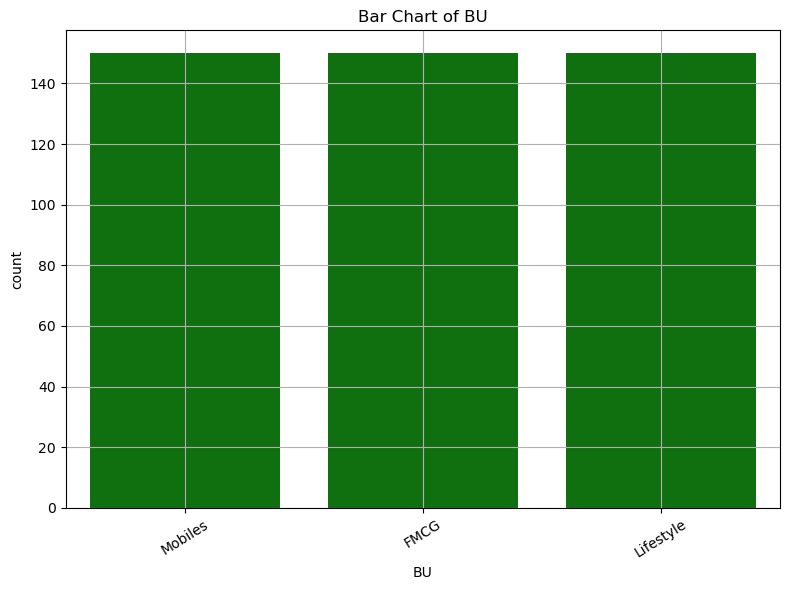

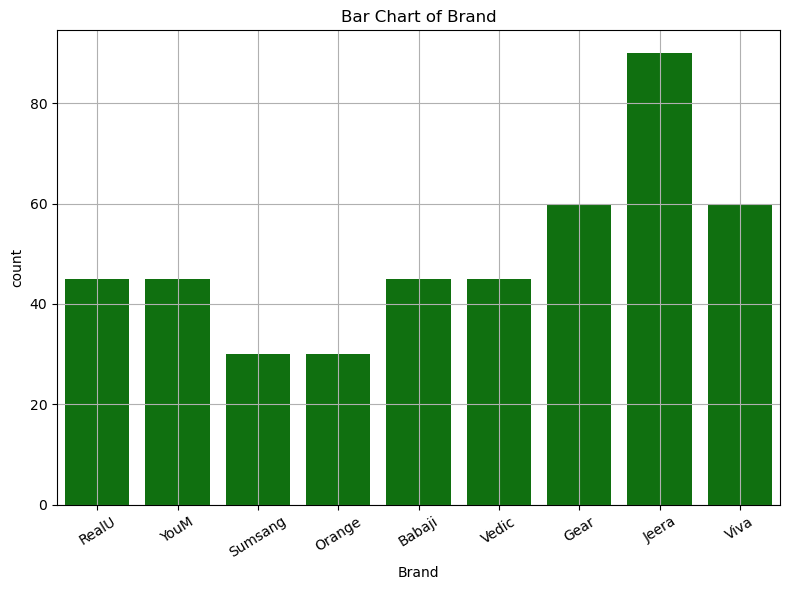

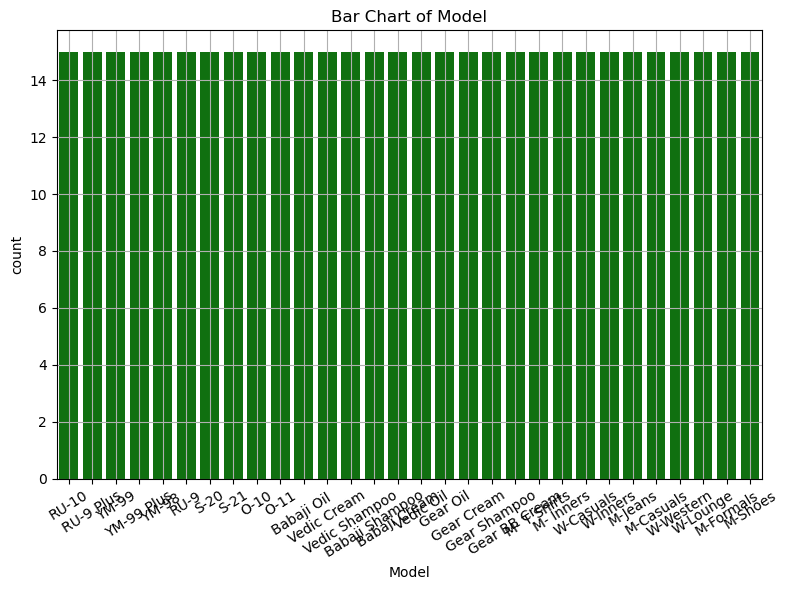

In [127]:
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col],color='green')
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=32)
    plt.tight_layout()
    plt.grid()

# Standardization of Numerical Variables

●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
   ●	Steps:
	Explain the concept of standardization (z-score normalization).
	Standardize the numerical columns using the formula: z=x-mu/sigma
	
	Show before and after comparisons of the data distributions.
                                                                                            

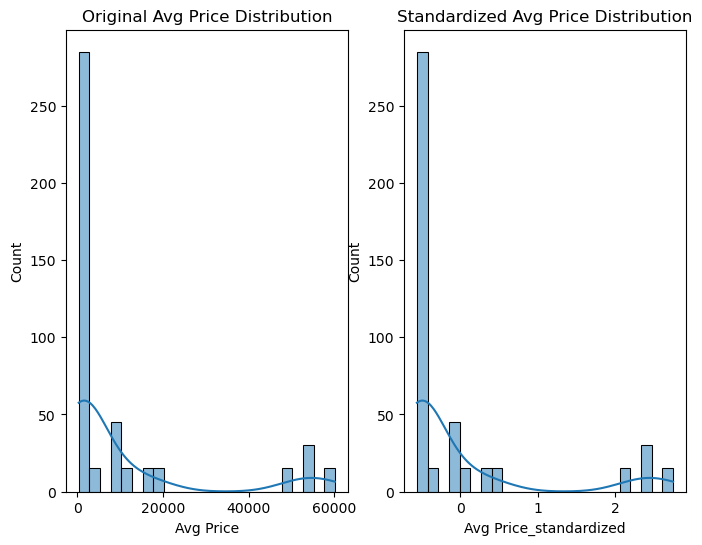

In [142]:
# Standardize the numerical columns (Z-score Normalization)
for col in num_cols:
    df[col + '_standardized'] = (df[col] - df[col].mean()) / df[col].std()
# Compare before and after standardization for one column
# Select the first comparison for numerical column.
col_to_compare = num_cols[1]  
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[col_to_compare], kde=True)
plt.title(f"Original {col_to_compare} Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df[col_to_compare + '_standardized'], kde=True)
plt.title(f"Standardized {col_to_compare} Distribution")
#display the matplotlib visualization
plt.show()

# Conversion of Categorical Data into Dummy Variables

In [159]:
# Convert categorical columns to dummy variables
df_encoded = pd.get_dummies(df, columns=cat_cols)
print(df_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0    160346.501180             2.347417                0.091072   
1     89323.897039             1.165831               -0.019548   
2    102042.089843             0.456880                0.312312   
3    112235.925298             0.220563                0.533552   
4     19927.053770            -0.488389               -0.130168   

   Total Sales Value_standardized  Discount Rate (%)_standardized  ...  \
0                        2.922469               

In [147]:
cat_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [161]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Columns: 107 entries, Volume to Model_YM-99 Plus
dtypes: bool(95), float64(9), int64(3)
memory usage: 84.1 KB


# Conclusion